# Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
!pip install --quiet keras_cv
import keras_cv

In [3]:
import gdown
gdown.download_folder('https://drive.google.com/drive/folders/178JEW7Adh972Zjv73f6TXhCPN42mBMqi?usp=sharing')

Retrieving folder contents


Retrieving folder 1PS1zNQE0ZX0PDAutnMeo1Z-coSA4AnEK data
Processing file 1wmpQgNOVSJl5Pk4GSnpByanHfeZ2zSVx image.tif
Processing file 1lO1LF5CgcFB4JOo2PsZ2kTGXzjV1JN-E image2.tif
Processing file 11pNj8L60b54zPmkgnA3fAOCCcUKIP-KP seg.tif
Processing file 1zN80hsa7bGUELFfij1J7q6JGVpUCneKI seg2.tif
Retrieving folder 1j1sOKPIND890qYfjfqU-IKwg_o02NfmD gan_model
Processing file 1-fcb-qw6Wvy5a9RNqtqyod5QXbcbYNW9 model.keras
Processing file 1lQc8wZiR97zqebO3ofkZFewuIU1kpc2Y localisation_model.keras
Processing file 1JaSIyk6vFjSDQvSAeCFw1KGM-1cYzPPH regression_model_TL.keras
Processing file 1d2MdE-uRkbt91AkY5GsHnOj3fiPDHaCn regression_model.keras
Processing file 1jL6B6u2vPM8oYW1r8iGtAgOcdEkG-Wyq wormAI_tools.py
Processing file 1K4dUyEbuAWr2QbbzlVVulq5hDNjLBpYr wormGAN.py


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1wmpQgNOVSJl5Pk4GSnpByanHfeZ2zSVx
To: /content/wormAI/data/image.tif
100%|██████████| 1.39M/1.39M [00:00<00:00, 32.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1lO1LF5CgcFB4JOo2PsZ2kTGXzjV1JN-E
To: /content/wormAI/data/image2.tif
100%|██████████| 1.39M/1.39M [00:00<00:00, 13.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=11pNj8L60b54zPmkgnA3fAOCCcUKIP-KP
To: /content/wormAI/data/seg.tif
100%|██████████| 33.2k/33.2k [00:00<00:00, 48.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zN80hsa7bGUELFfij1J7q6JGVpUCneKI
To: /content/wormAI/data/seg2.tif
100%|██████████| 32.5k/32.5k [00:00<00:00, 40.9MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1-fcb-qw6Wvy5a9RNqtqyod5QXbcbYNW9
From (redirected): https://drive.google.com/uc?id=1-fcb-qw6Wvy5a9RNqtqyod5QXbcbYNW9&confirm=t&uuid=130b1

['/content/wormAI/data/image.tif',
 '/content/wormAI/data/image2.tif',
 '/content/wormAI/data/seg.tif',
 '/content/wormAI/data/seg2.tif',
 '/content/wormAI/gan_model/model.keras',
 '/content/wormAI/localisation_model.keras',
 '/content/wormAI/regression_model_TL.keras',
 '/content/wormAI/regression_model.keras',
 '/content/wormAI/wormAI_tools.py',
 '/content/wormAI/wormGAN.py']

In [6]:
from wormAI import wormAI_tools as wormAI

/usr/local/lib/python3.11/dist-packages/keras/src/saving/serialization_lib.py:734: UserWarning: `compile()` was not called as part of model loading because the model's `compile()` method is custom. All subclassed Models that have `compile()` overridden should also override `get_compile_config()` and `compile_from_config(config)`. Alternatively, you can call `compile()` manually after loading.
  instance.compile_from_config(compile_config)


# Load data

In [9]:
im = cv2.imread('/content/wormAI/data/image.tif')
im2 = cv2.imread('/content/wormAI/data/image2.tif')

In [10]:
temp = np.array([im,im2])
temp.shape

(2, 1024, 1360, 3)

# Run WormDET and WormREG (detection model)

In [11]:
bboxes, confs, ndets, ls, ws, im_id = wormAI.detect_worms(temp, image_scale =1.6) #image scale in microns per pixel

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
detection complete


In [12]:
print(f'widths [{chr(956)}m]:', ws)
print(f'lengths [{chr(956)}m]:', ls)

widths [μm]: [21.20423584 31.86444702]
lengths [μm]: [779.15493164 679.24648438]


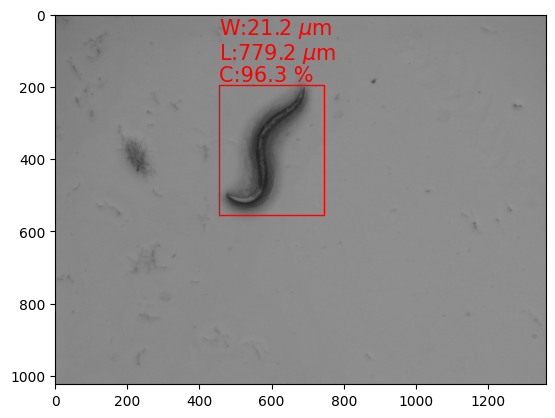

In [13]:
wormAI.plot_detections(temp, bboxes, confs, ndets, ls, ws, im_id, idx=0) #ground truth w: 60.458, l:725.138

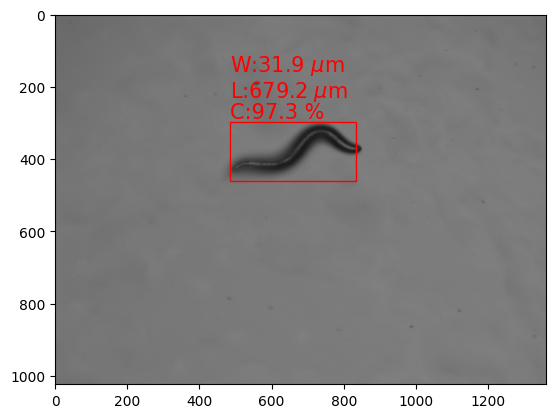

In [14]:
wormAI.plot_detections(temp, bboxes, confs, ndets, ls, ws, im_id, idx=1) #ground truth w: 50.036, l: 643.343

# Run WormGAN (simulator model)

In [7]:
mask, x,y, dx, dy = wormAI.generate_worm(w=500, h=500, length=350, wiggle=(250//10),r=30,ns=5)

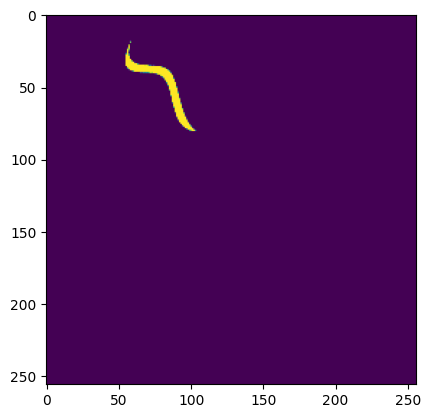

In [8]:
plt.imshow(mask)

In [9]:
fake_worm = wormAI.get_worm_sim(mask)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


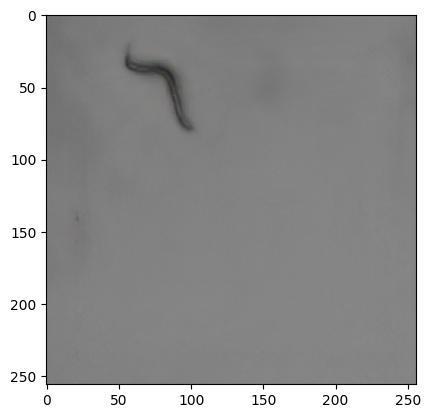

In [10]:
plt.imshow(fake_worm[0])